<a href="https://colab.research.google.com/github/NafisaTarannumLamisa/ML-lab-work/blob/main/Ransomware_attack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fake_news_dataset.csv')
df

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake
...,...,...,...,...,...,...,...
19995,House party born.,hit and television I change very our happy doo...,2024-12-04,BBC,Gary Miles,Entertainment,fake
19996,Though nation people maybe price box.,fear most meet rock even sea value design stan...,2024-05-26,Daily News,Maria Mcbride,Entertainment,real
19997,Yet exist with experience unit.,activity loss very provide eye west create wha...,2023-04-17,BBC,Kristen Franklin,Entertainment,real
19998,School wide itself item.,term point general common training watch respo...,2024-06-30,Reuters,David Wise,Health,fake


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
title,0
text,0
date,0
source,1000
author,1000
category,0
label,0


In [ ]:
df.dropna(inplace=True)
df.describe()

,title,text,date,source,author,category,label
count,18045,18045,18045,18045,18045,18045,18045
unique,18045,18045,1096,8,16249,7,2
top,Offer chair cover senior born.,remain pressure glass me six senior though nor...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,29,2316,11,2622,9095


In [ ]:
drop_cols = ['title', 'date']
df1 = df.drop(columns=drop_cols, axis=1)
df1

,text,source,author,category,label
0,more tax development both store agreement lawy...,NY Times,Paula George,Politics,real
1,probably guess western behind likely next inve...,Fox News,Joseph Hill,Politics,fake
2,them identify forward present success risk sev...,CNN,Julia Robinson,Business,fake
3,phone which item yard Republican safe where po...,Reuters,Mr. David Foster DDS,Science,fake
4,wonder myself fact difficult course forget exa...,CNN,Austin Walker,Technology,fake
...,...,...,...,...,...
19995,hit and television I change very our happy doo...,BBC,Gary Miles,Entertainment,fake
19996,fear most meet rock even sea value design stan...,Daily News,Maria Mcbride,Entertainment,real
19997,activity loss very provide eye west create wha...,BBC,Kristen Franklin,Entertainment,real
19998,term point general common training watch respo...,Reuters,David Wise,Health,fake


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode the columns which have object type data
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])
df1

,text,source,author,category,label
0,9609,5,12533,3,1
1,11920,3,7922,3,0
2,15763,1,8172,0,0
3,11380,6,11663,4,0
4,17673,1,1399,6,0
...,...,...,...,...,...
19995,7030,0,5487,1,0
19996,5433,2,10238,1,1
19997,371,0,9238,1,1
19998,15641,6,4074,2,0


In [ ]:
#Feature-label split
X = df1.drop(columns=['label'])
y = df1['label']

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size=0.2, random_state=42,)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model test and train**

In [ ]:
#Binary Class Classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=30, random_state=42)
}

Model: Decision Tree

Accuracy : 0.5048489886395123
Precision: 0.49333333333333335
Recall   : 0.5036868973340897
F1 Score : 0.49845635700252594
Confusion Matrix:
 [[934 912]
 [875 888]]

Model: KNN

Accuracy : 0.4993072873372125
Precision: 0.4877232142857143
Recall   : 0.49574588769143507
F1 Score : 0.49170182841068916
Confusion Matrix:
 [[928 918]
 [889 874]]

Model: Random Forest

Accuracy : 0.5070656691604323
Precision: 0.4951980792316927
Recall   : 0.4679523539421441
F1 Score : 0.48118985126859143
Confusion Matrix:
 [[1005  841]
 [ 938  825]]



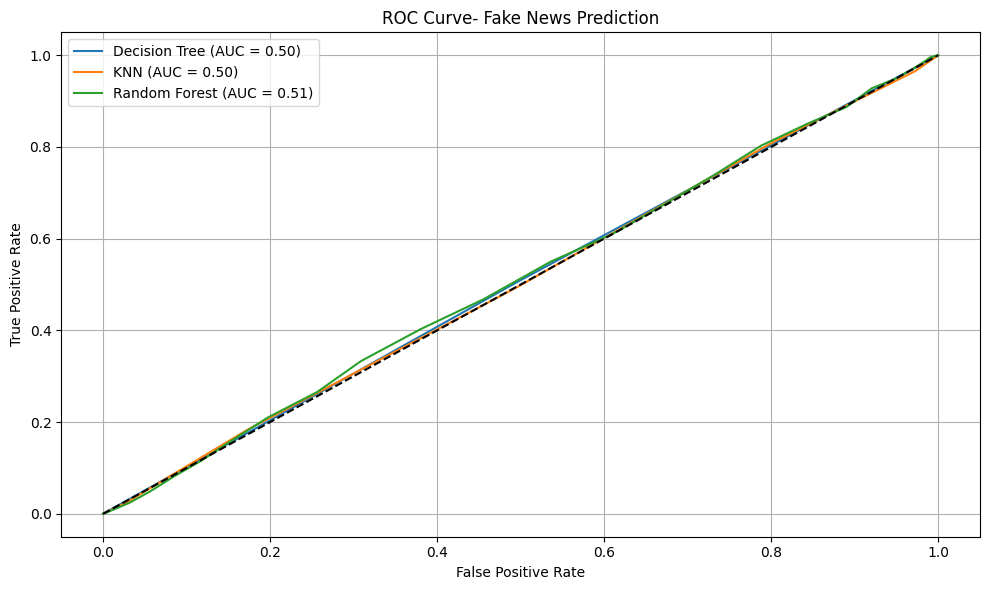

In [ ]:
#Train, Predict, Evaluate
plt.figure(figsize=(10, 6))
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  y_prob = model.predict_proba(X_test_scaled)[:, 1]

  print(f'Model: {name}\n')
  print("Accuracy :", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall   :", recall_score(y_test, y_pred))
  print("F1 Score :", f1_score(y_test, y_pred))
  print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n')

  #ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

  #Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Fake News Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/heart_disease_risk_dataset_earlymed.csv')
data

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,56.0,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [36]:
data.isnull().sum()

,0
Chest_Pain,0
Shortness_of_Breath,0
Fatigue,0
Palpitations,0
Dizziness,0
Swelling,0
Pain_Arms_Jaw_Back,0
Cold_Sweats_Nausea,0
High_BP,0
High_Cholesterol,0


In [37]:
data.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


In [38]:
#Feature-label split
X = data.drop('Chest_Pain', axis=1)
y = data['Chest_Pain']

In [39]:
#Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
class_names

array([0., 1.])

In [55]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [56]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)



**Model test and train**

In [42]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
#Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


Decision Tree Metrics:

Accuracy: 0.6650714285714285
Precision: 0.6651866949032723
Recall: 0.6651188491217186
F1 Score: 0.6650488279119854

Confusion Matrix:
[[4713 2257]
 [2432 4598]]


KNN Metrics:

Accuracy: 0.7657142857142857
Precision: 0.7657110628442514
Recall: 0.7657148804773966
F1 Score: 0.7657119715223311

Confusion Matrix:
[[5338 1632]
 [1648 5382]]


Random Forest Metrics:

Accuracy: 0.7590714285714286
Precision: 0.7590700301377704
Recall: 0.7590746564732822
F1 Score: 0.7590699227584459

Confusion Matrix:
[[5296 1674]
 [1699 5331]]



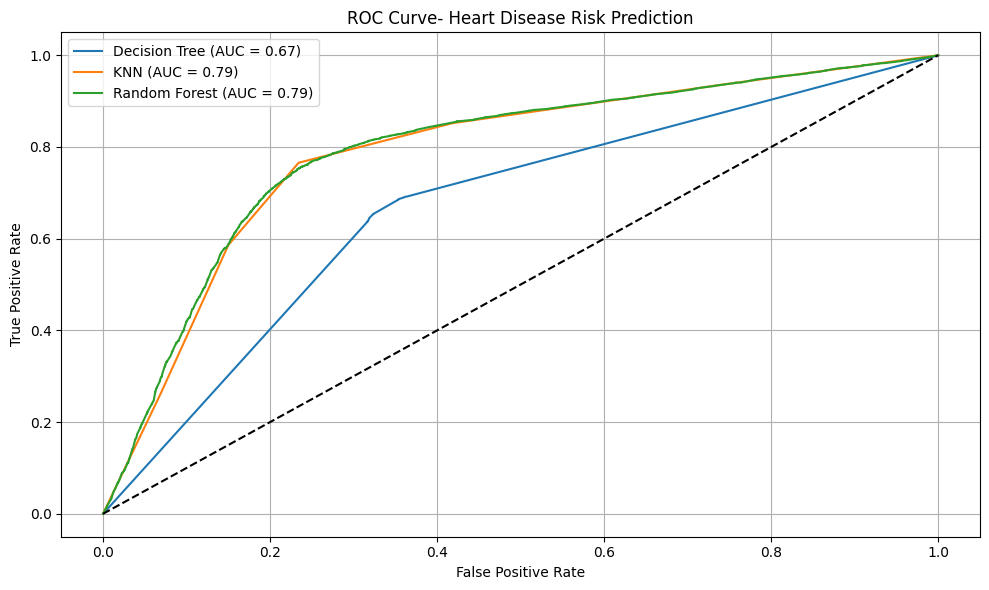

In [62]:
# Train, Test, Evaluate
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    print(f'\n{name} Metrics:\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    # ROC curve for binary classification
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Heart Disease Risk Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()